In [7]:
import torch
import matplotlib.pyplot as plt
dist = torch.distributions

%matplotlib inline
# retina
%config InlineBackend.figure_format = 'retina'


In [13]:
alpha = 20
beta = 30
post = dist.Beta(alpha, beta)

In [46]:
x_lin = torch.linspace(0., 1, 500)

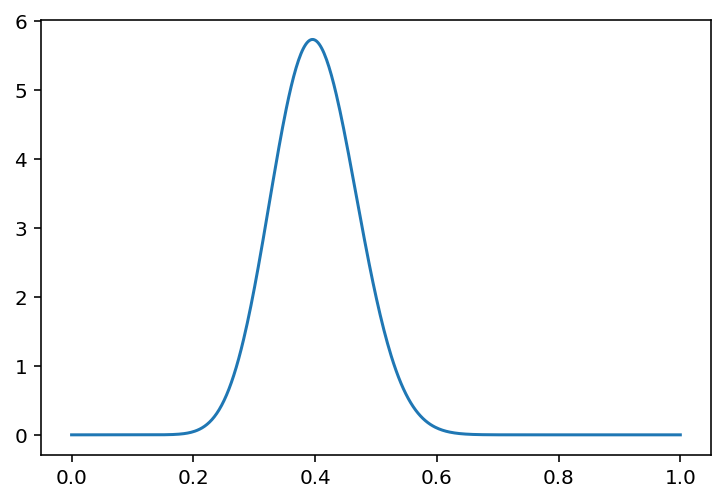

In [47]:
ys = post.log_prob(x_lin).exp()
plt.plot(x_lin, ys)


In [48]:
# MAP of post (Beta(20, 30))

theta_map = torch.tensor((alpha - 1) / (alpha + beta - 2))

In [49]:
theta_map

tensor(0.3958)

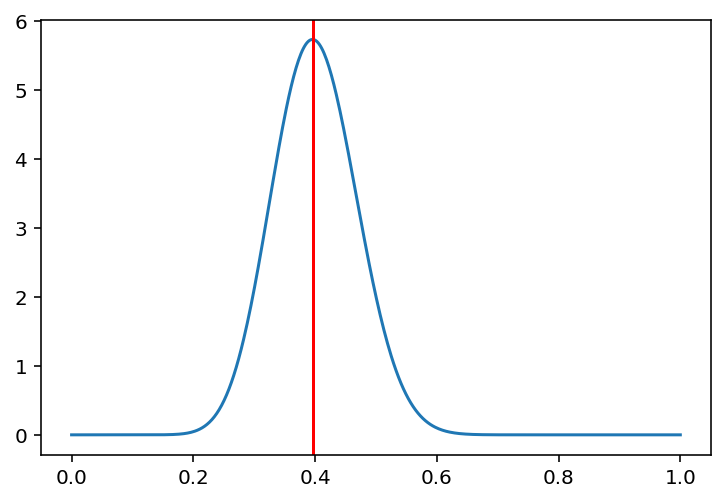

In [50]:
plt.plot(x_lin, ys)
plt.axvline(theta_map.item(), color='red')

In [51]:
f = lambda x: post.log_prob(x)

from torch.autograd.functional import hessian

scale = 1/torch.sqrt(-hessian(f, theta_map))

# Find gradient of log_post wrt theta



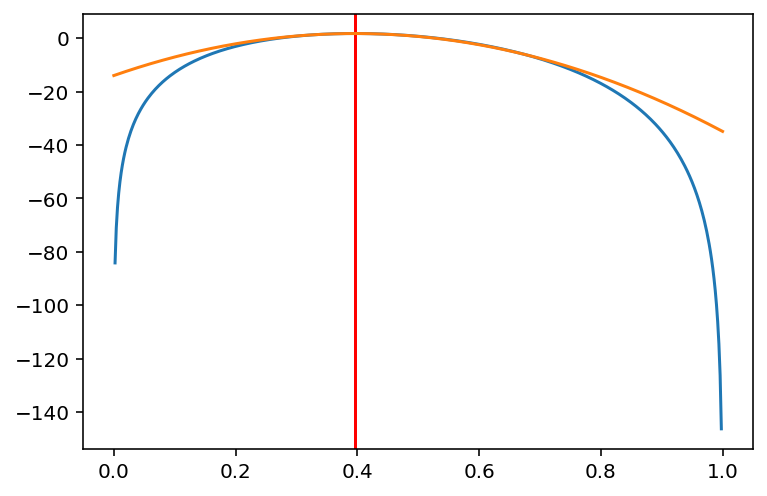

In [52]:
plt.plot(x_lin, post.log_prob(x_lin))
plt.axvline(theta_map.item(), color='red')

appx = dist.Normal(theta_map, scale)
plt.plot(x_lin, appx.log_prob(x_lin))

In [53]:
import jax
import tensorflow_probability.substrates.jax.distributions as tfd

In [54]:
beta_jax = tfd.Beta(alpha, beta)

In [38]:
-jax.hessian(beta_jax.log_prob)(theta_map)

TypeError: Argument '0.3958333432674408' of type <class 'torch.Tensor'> is not a valid JAX type.

In [27]:
jax.hessian(beta_jax.log_prob(theta_map))

TypeError: Expected a callable value, got 1.7470932006835938

In [ ]:
appx_posterior = dist.Normal(theta_map, )